In [1]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches
import numpy as np
import cv2
import os

In [2]:
vidcap = cv2.VideoCapture('side-by-side.mp4')
success, image = vidcap.read()
count = 0
success = True
files = []
if not os.path.exists('frames'):
    os.mkdir('frames')
while success:
    success, image = vidcap.read()
    if success:
        f = os.path.join('frames', 'frame%d.jpg'%count)
        cv2.imwrite(f, image)
        files.append(f)
    if cv2.waitKey(10) == 27:      
        break
    count += 1

In [3]:
def split_frame(image):
    '''
    splits side-by-side image into two images
    '''
    w = image.shape[1]
    left_image = image[:, :w//2, :]
    right_image = image[:, w//2:, :]
    return left_image, right_image

def crop_to_square(image):
    '''
    returns image cropped to size of mask
    '''
    SQR_SIZE = 370 # size of mondrian mask in pixels 
    w = image.shape[1]
    x = (w - SQR_SIZE) // 2
    cropped = image[x:(x+SQR_SIZE), x:(x+SQR_SIZE), :]
    return cropped, SQR_SIZE/w

def draw_arrow(fig, coord1, coord2):
    arrow = patches.FancyArrowPatch(
        coord1,  # posA
        coord2,  # posB
        shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        shrinkB=0,  # so head is exactly on posB (default shrink is 2)
        transform=fig.transFigure,
        color="black",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
    fig.patches.append(arrow)
    return arrow

def savefig(fname):
    save_dir = 'illustrations'
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    fpath = os.path.join(save_dir, fname)
    plt.savefig(fpath, dpi = 500, bbox_inches = 'tight')
    return fpath

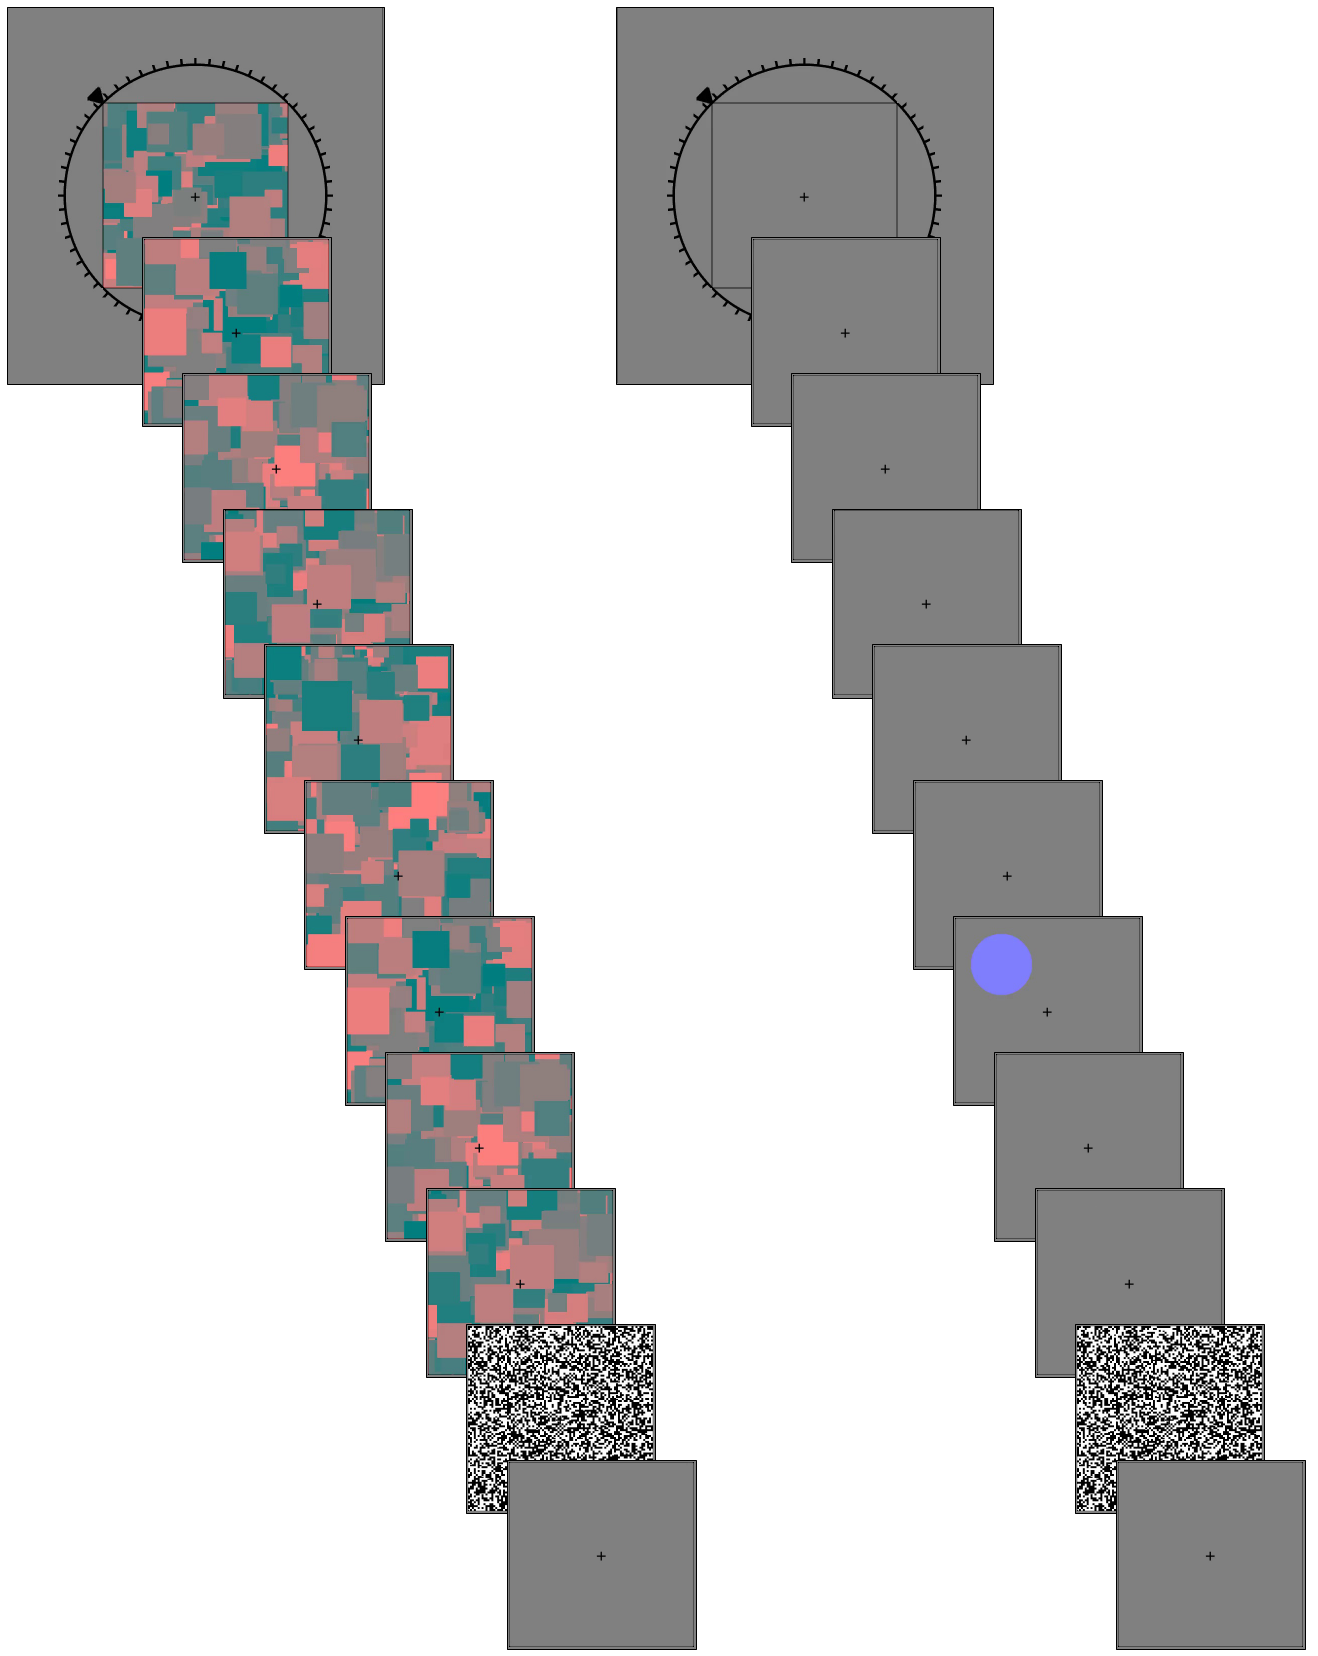

In [4]:
def draw_series(ax, files, side, operant = True, masked = True, iter_idx = 12):
    zoom = .5
    # draw first image
    if operant:
        start_idx = 1
    else:
        start_idx = 0
    im_files = files[start_idx:len(files):iter_idx]
    f = im_files.pop(0)
    image = plt.imread(f)
    if side == 'left':
        image, _ = split_frame(image)
    elif side == 'right':
        _, image = split_frame(image)
    imagebox = OffsetImage(image, zoom = zoom)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    pos = (0, 1)
    ab = AnnotationBbox(
        imagebox, 
        xy = pos, 
        xycoords = 'axes fraction',
        boxcoords = ('axes fraction', 'axes fraction'),
        box_alignment = (.5, .5),
        pad = .1,
        bboxprops = dict(color = 'gray', edgecolor = 'black'),
        frameon = True
    )
    ax.add_artist(ab)
    # add subsequent frames
    for i, f in enumerate(im_files[:10]):
        if (i == 8) and masked:
            _side = 'left'
        else:
            _side = side
        pos = (pos[0] + .08, pos[1] - .25)
        image = plt.imread(f)
        if _side == 'left':
            image, _ = split_frame(image)
        elif _side == 'right':
            _, image = split_frame(image)
        image_cropped, ratio = crop_to_square(image)
        imagebox = OffsetImage(image_cropped, zoom = zoom)
        ab = AnnotationBbox(
            imagebox, 
            xy = pos, 
            xycoords = 'axes fraction',
            boxcoords = ('axes fraction', 'axes fraction'),
            box_alignment = (.5, .5),
            pad = .2,
            bboxprops = dict(color = 'gray', edgecolor = 'black'),
            frameon = True
        )
        ax.add_artist(ab)
    ax.axis('off')
    

fig, axs = plt.subplots(1, 2, figsize = (20, 10))
draw_series(axs[0], files, 'left')
draw_series(axs[1], files, 'right')
savefig('masked-operant.jpeg')
plt.show()

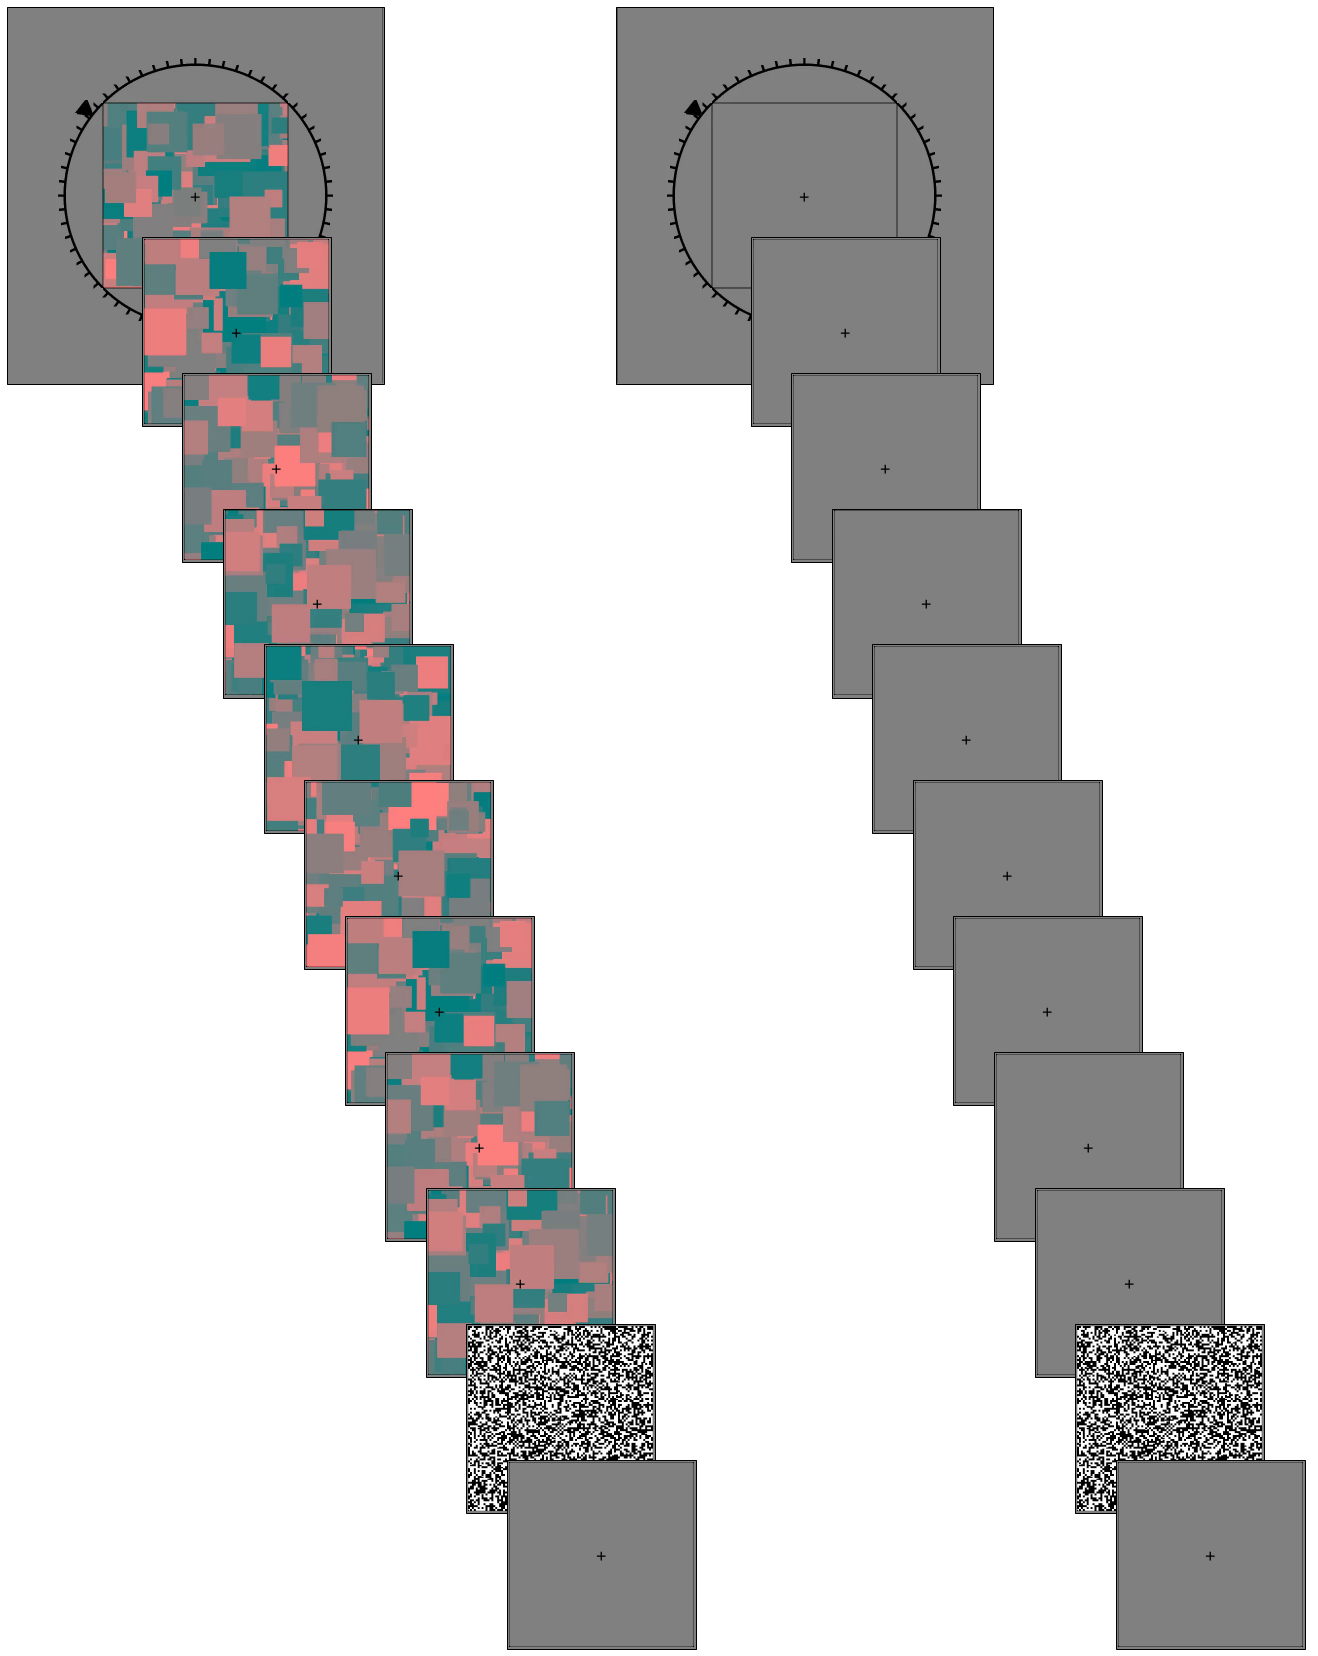

In [5]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))
draw_series(axs[0], files, 'left', operant = False)
draw_series(axs[1], files, 'right', operant = False)
savefig('masked-baseline.jpeg')
plt.show()

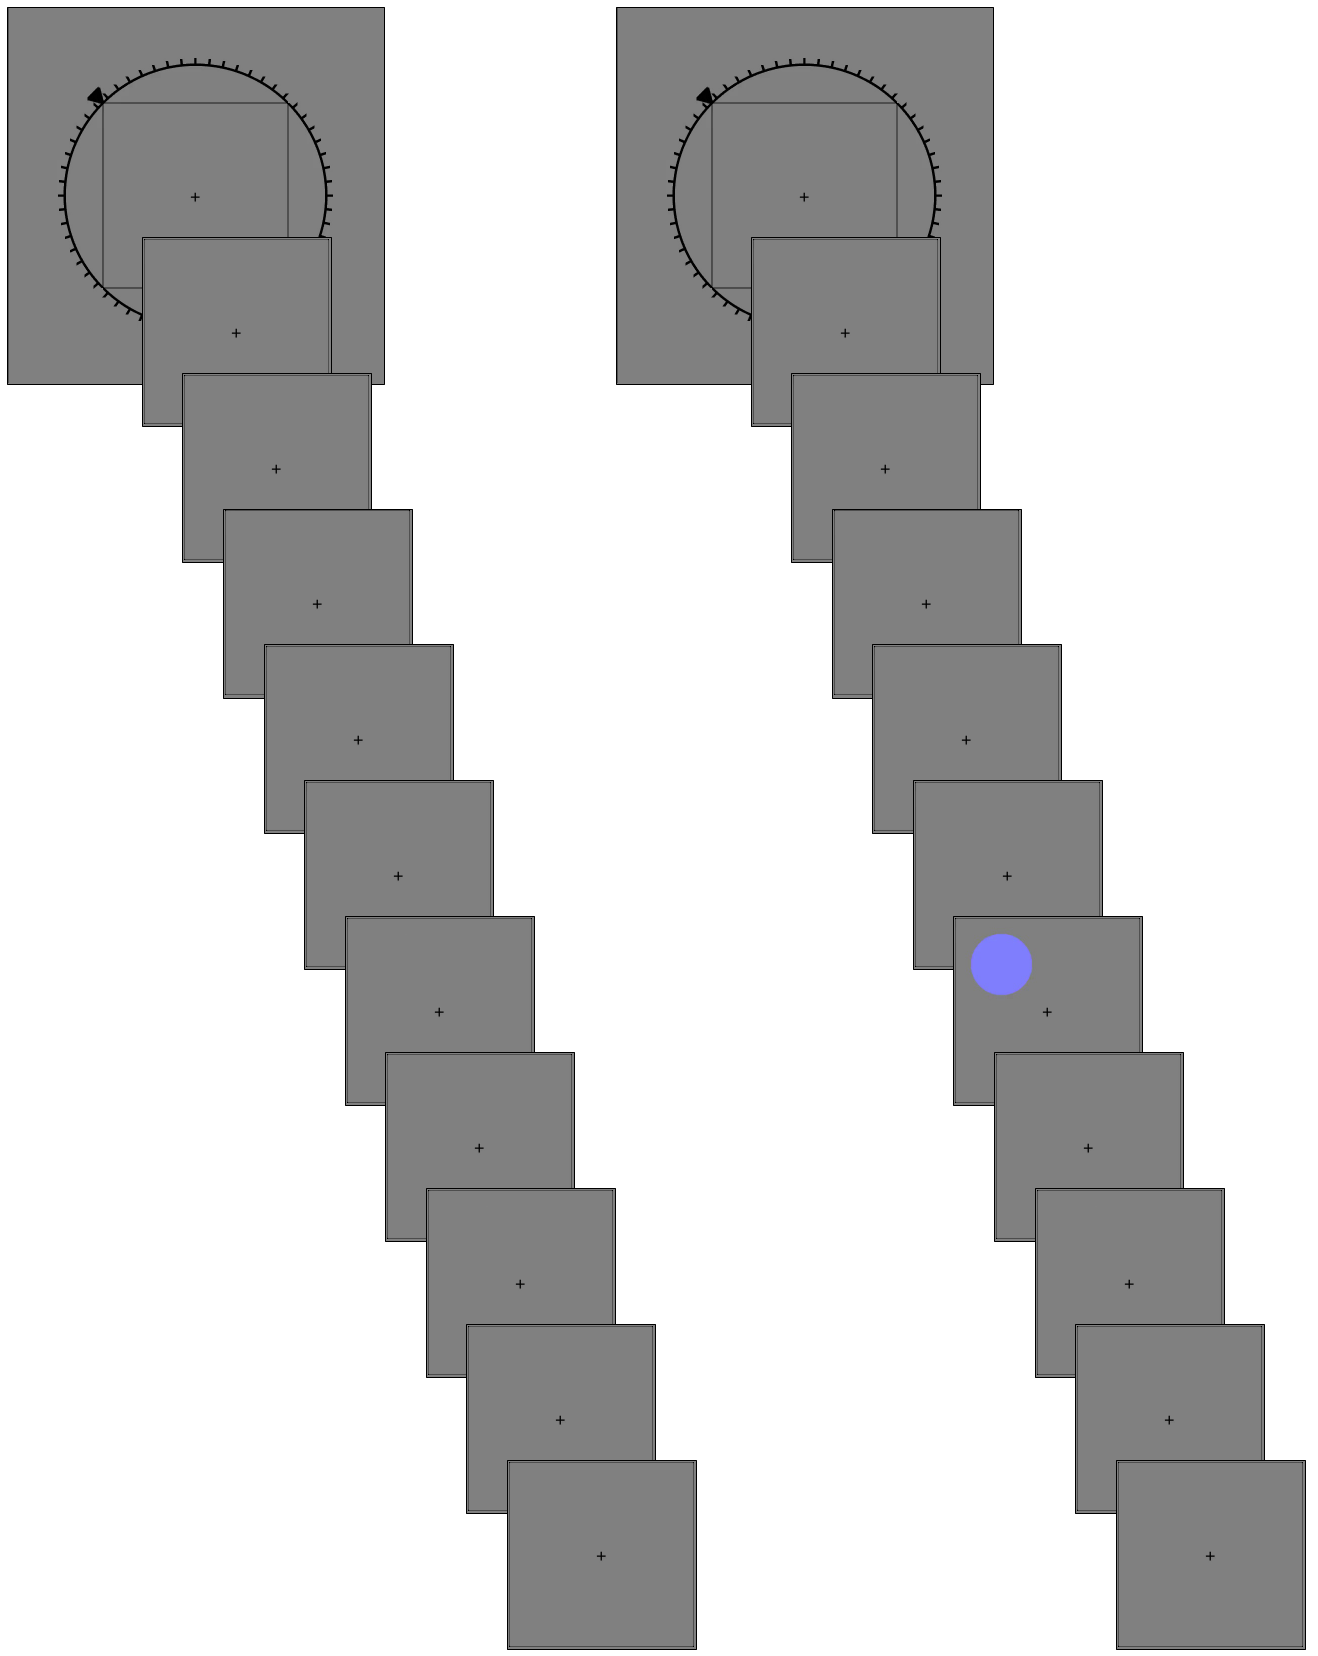

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))
draw_series(axs[0], files, 'right', masked = False, iter_idx = 13)
draw_series(axs[1], files, 'right', masked = False)
savefig('unmasked-operant.jpeg')
plt.show()

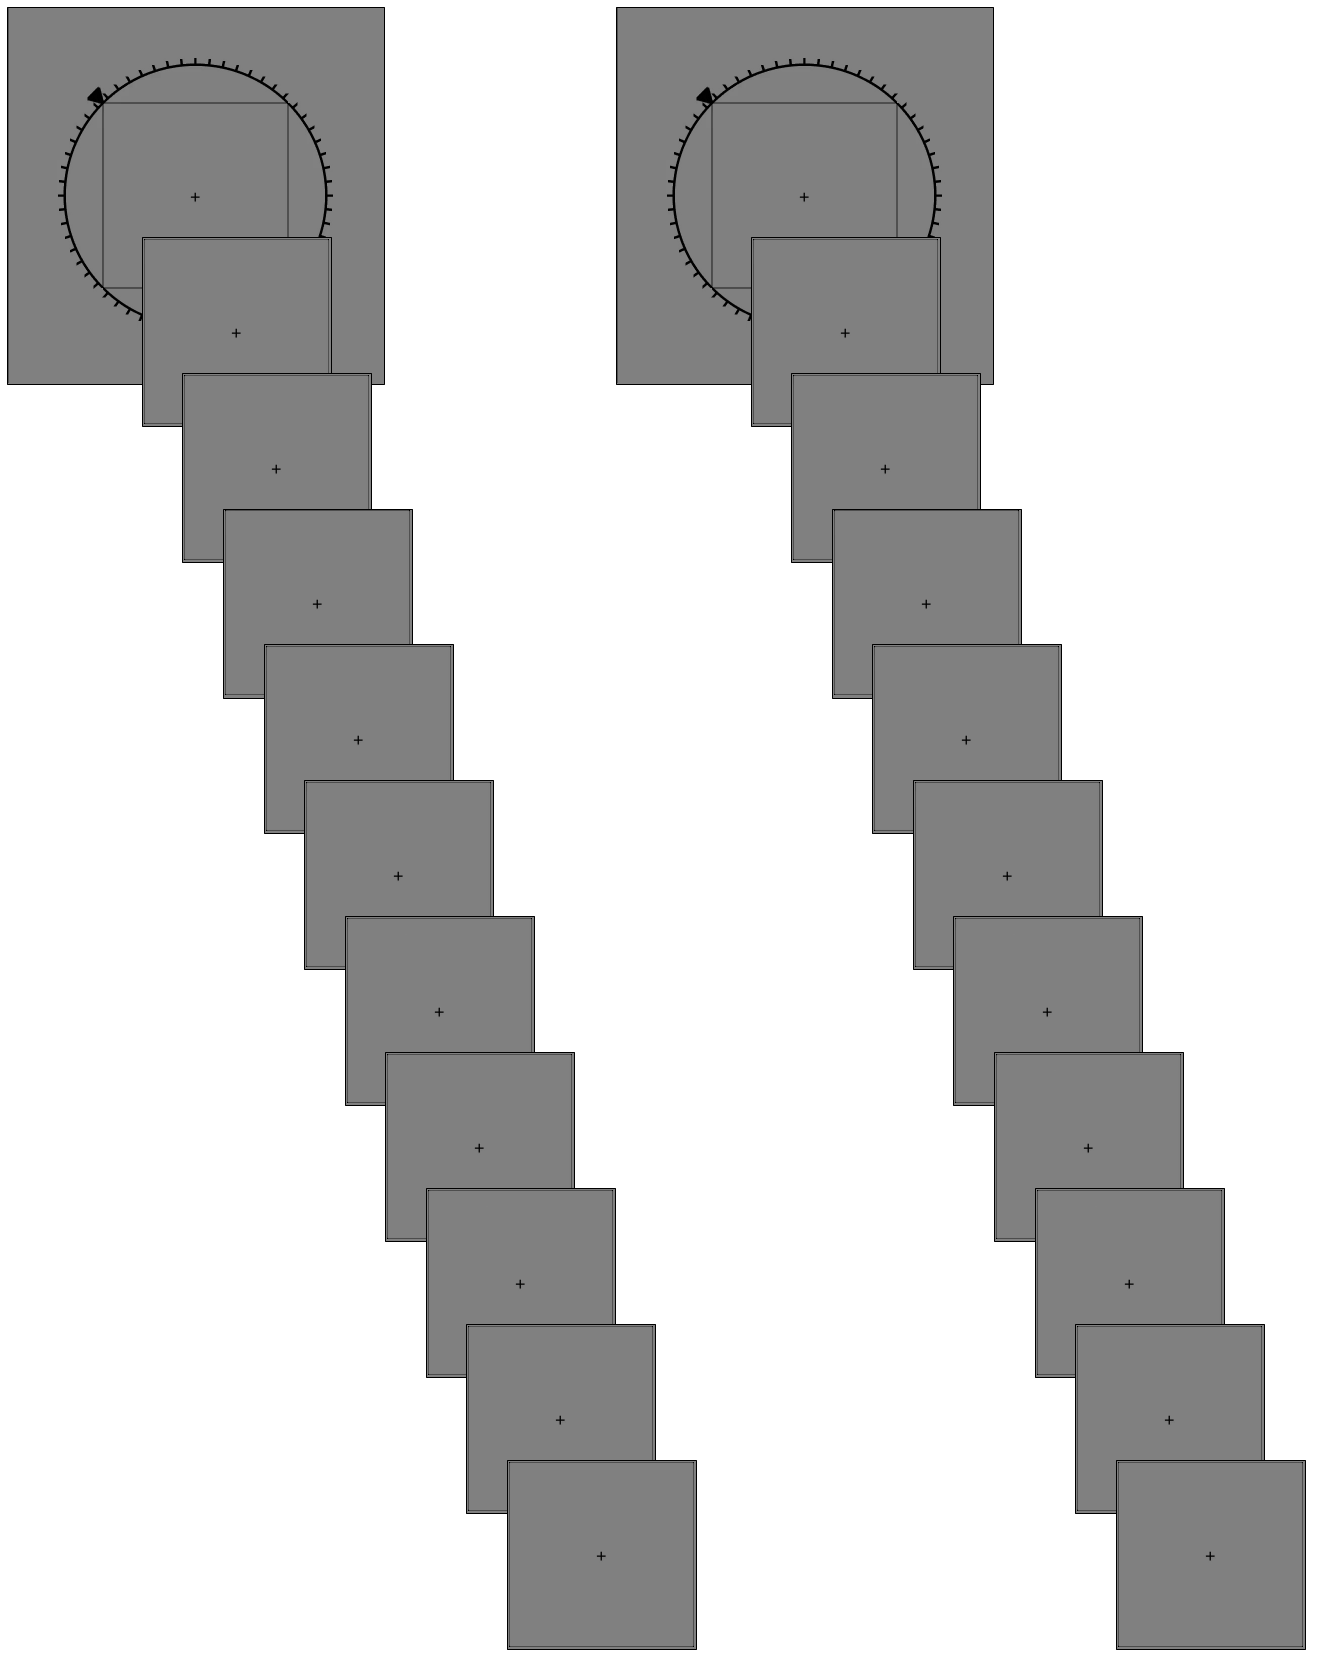

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))
draw_series(axs[0], files, 'right', masked = False, iter_idx = 13)
draw_series(axs[1], files, 'right', masked = False, iter_idx = 13)
savefig('unmasked-baseline.jpeg')
plt.show()

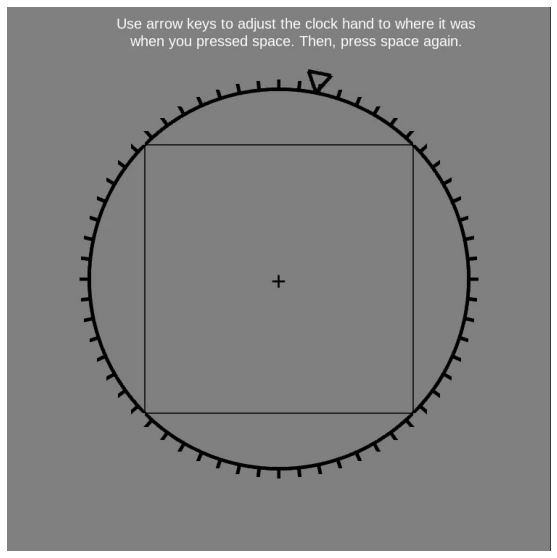

In [8]:
fig, ax = plt.subplots(figsize = (10, 10))
image = plt.imread(files[-1])
left_image, _ = split_frame(image)
ax.imshow(left_image)
ax.axis('off')
savefig('end-of-trial.jpeg')
plt.show()

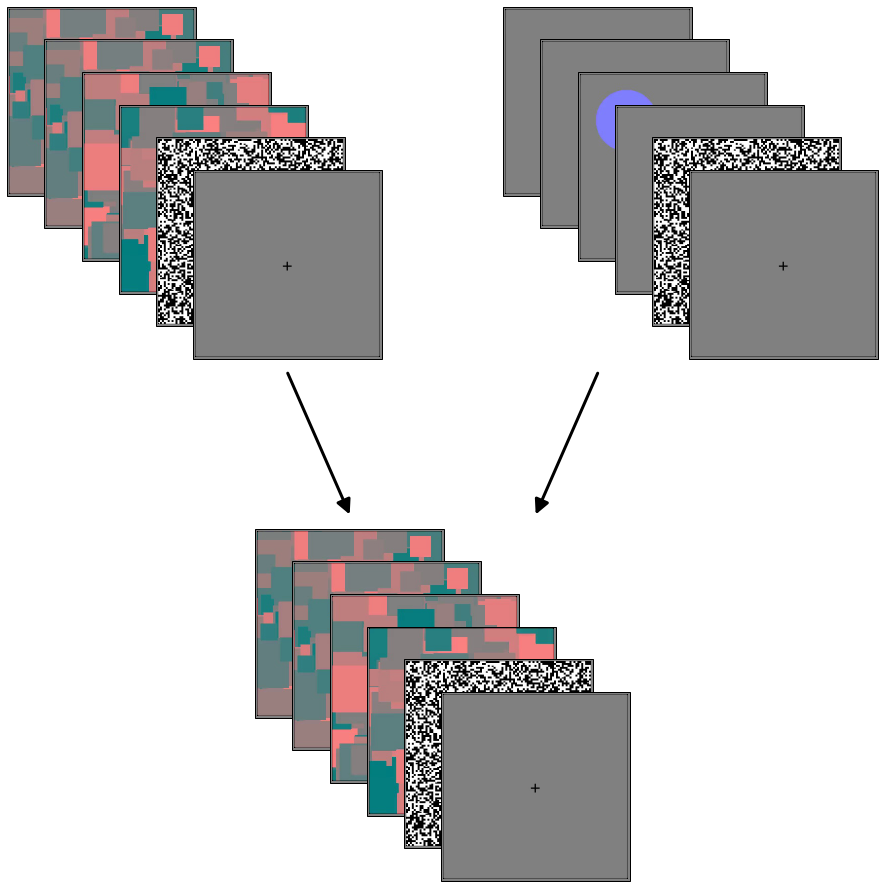

In [9]:
def draw_series_disc(ax, files, side):
    
    im_files = files[65:85:5] + [files[110], files[120]]
    
    zoom = .5
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    pos = (0, 1)
    for i, f in enumerate(im_files):
        if i > 0:
            pos = (pos[0] + .6, pos[1] - 1.5)
        image = plt.imread(f)
        if (side == 'left') or (i == len(im_files) - 2):
            image, _ = split_frame(image)
        elif side == 'right':
            _, image = split_frame(image)
        image_cropped, ratio = crop_to_square(image)
        imagebox = OffsetImage(image_cropped, zoom = zoom)
        ab = AnnotationBbox(
            imagebox, 
            xy = pos, 
            xycoords = 'axes fraction',
            boxcoords = ('axes fraction', 'axes fraction'),
            box_alignment = (.5, .5),
            pad = .2,
            bboxprops = dict(color = 'gray', edgecolor = 'black'),
            frameon = True
        )
        ax.add_artist(ab)
    ax.axis('off')
    return pos[0], pos[1] - 5
    
fig = plt.figure(figsize = (10, 10))
gs = gridspec.GridSpec(5, 5, wspace = 1., hspace = 5.)

ax1 = fig.add_subplot(gs[0, 0])
draw_series_disc(ax1, files, 'left')
ax2 = fig.add_subplot(gs[0, 4])
draw_series_disc(ax2, files, 'right')
ax3 = fig.add_subplot(gs[-1, 2])
x_mid, y_lower = draw_series_disc(ax3, files, 'left')

y_max = np.max(ax3.get_ylim()) + 5
transFigure = fig.transFigure.inverted()
coord1 = transFigure.transform(ax1.transData.transform((x_mid, y_lower)))
coord2 = transFigure.transform(ax3.transData.transform((0, y_max)))
draw_arrow(fig, coord1, coord2)
coord1 = transFigure.transform(ax2.transData.transform((0, y_lower)))
coord2 = transFigure.transform(ax3.transData.transform((0 + x_mid, y_max)))
draw_arrow(fig, coord1, coord2)

savefig('cfs.jpeg')
plt.show()